In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataframe=pd.read_csv("C:\\Users\\salam\\Downloads\\WORLDDEVIND.csv")
dataframe.head()

,Country Name,Country Code,Series Name,Series Code,2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],...,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,11.229715,5.357403,13.826320,3.924984,21.390528,14.362441,...,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.738839,-6.240172,2.266944,NaN
1,Afghanistan,AFG,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,7.383377,1.132485,11.692303,1.677279,17.043896,11.055031,...,-1.665057,-0.300121,-0.195570,-1.713743,0.856295,-5.382515,-22.584482,-7.576669,0.106093,NaN
2,Afghanistan,AFG,Gross capital formation (annual % growth),NE.GDI.TOTL.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-9.602974,29.089618,-5.299506,NaN
3,Afghanistan,AFG,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.KD.ZG,17.698103,-5.109251,14.700446,-14.916330,44.562955,-6.375134,...,-5.657218,5.971752,6.411059,-4.415311,17.459825,5.942340,-9.780634,-6.564078,2.224867,NaN
4,Afghanistan,AFG,"Industry (including construction), value added...",NV.IND.TOTL.KD.ZG,12.991724,13.667543,7.633126,5.741818,6.107141,6.270601,...,4.171121,-0.765914,9.206792,11.074642,4.848868,-4.630253,-12.808740,-5.725220,1.796343,NaN


In [5]:
trial=pd.DataFrame(dataframe.groupby('Country Name')['2015 [YR2015]'].apply(lambda x: x.isnull().sum()).sort_values(ascending=False))


In [7]:
trial.columns

Index(['2015 [YR2015]'], dtype='object')

In [9]:
trial

,2015 [YR2015]
Country Name,
British Virgin Islands,22
Gibraltar,22
"Korea, Dem. People's Rep.",20
Channel Islands,20
Eritrea,20
...,...
Japan,0
Canada,0
Belarus,0


In [11]:
conttoremove=trial[trial['2015 [YR2015]']>10].index

In [13]:
conttoremove

Index(['British Virgin Islands', 'Gibraltar', 'Korea, Dem. People's Rep.',
       'Channel Islands', 'Eritrea', 'Liechtenstein',
       'St. Martin (French part)', 'Nauru', 'Virgin Islands (U.S.)',
       'Venezuela, RB', 'Monaco', 'Guam', 'New Caledonia', 'Tuvalu',
       'American Samoa', 'Northern Mariana Islands', 'Turkmenistan', 'Somalia',
       'Puerto Rico (US)', 'Faroe Islands', 'Curacao', 'San Marino',
       'French Polynesia', 'Sint Maarten (Dutch part)', 'Isle of Man'],
      dtype='object', name='Country Name')

In [15]:
newdf=pd.DataFrame()

In [17]:
newdf=pd.DataFrame(columns=dataframe['Series Name'].unique())

In [19]:
all_names=dataframe['Series Name'].unique()

In [21]:
len(all_names)

24

In [23]:
conttoremove

Index(['British Virgin Islands', 'Gibraltar', 'Korea, Dem. People's Rep.',
       'Channel Islands', 'Eritrea', 'Liechtenstein',
       'St. Martin (French part)', 'Nauru', 'Virgin Islands (U.S.)',
       'Venezuela, RB', 'Monaco', 'Guam', 'New Caledonia', 'Tuvalu',
       'American Samoa', 'Northern Mariana Islands', 'Turkmenistan', 'Somalia',
       'Puerto Rico (US)', 'Faroe Islands', 'Curacao', 'San Marino',
       'French Polynesia', 'Sint Maarten (Dutch part)', 'Isle of Man'],
      dtype='object', name='Country Name')

In [25]:
dataframe = dataframe[~dataframe['Country Name'].isin(conttoremove)]

In [27]:
len(dataframe)

4608

In [29]:
dictfordf={}
for element in all_names:
    listim=[]
    zzzz=dataframe[dataframe['Series Name']==element].iloc[:,4:]
    zzzz=np.array(zzzz)
    zero=0
    print(element)
    while zero<=len(zzzz)-1:
        dero=0
        while dero<=(len(zzzz[dero])-1):
            value=zzzz[zero][dero]
            listim.append(value)
            dero=dero+1
            
            
        zero=zero+1
        dictfordf[element]=listim
    

GDP growth (annual %)
GDP per capita growth (annual %)
Gross capital formation (annual % growth)
Agriculture, forestry, and fishing, value added (annual % growth)
Industry (including construction), value added (annual % growth)
Services, value added (annual % growth)
Manufacturing, value added (annual % growth)
Imports of goods and services (annual % growth)
Exports of goods and services (annual % growth)
Agriculture, forestry, and fishing, value added (current LCU)
Industry (including construction), value added (current LCU)
Manufacturing, value added (current LCU)
Total natural resources rents (% of GDP)
Services, value added (current LCU)
Lending interest rate (%)
Deposit interest rate (%)
Bank capital to assets ratio (%)
Age dependency ratio (% of working-age population)
Gini index
Merchandise imports (current US$)
Merchandise exports (current US$)
Tariff rate, applied, simple mean, all products (%)
Population growth (annual %)
Proportion of people living below 50 percent of median

In [77]:
newdf=pd.DataFrame(dictfordf)

In [79]:
newdf

,GDP growth (annual %),GDP per capita growth (annual %),Gross capital formation (annual % growth),"Agriculture, forestry, and fishing, value added (annual % growth)","Industry (including construction), value added (annual % growth)","Services, value added (annual % growth)","Manufacturing, value added (annual % growth)",Imports of goods and services (annual % growth),Exports of goods and services (annual % growth),"Agriculture, forestry, and fishing, value added (current LCU)",...,Lending interest rate (%),Deposit interest rate (%),Bank capital to assets ratio (%),Age dependency ratio (% of working-age population),Gini index,Merchandise imports (current US$),Merchandise exports (current US$),"Tariff rate, applied, simple mean, all products (%)",Population growth (annual %),Proportion of people living below 50 percent of median income (%)
0,11.229715,7.383377,NaN,17.698103,12.991724,5.388267,3.279537,NaN,NaN,9.588454e+10,...,NaN,NaN,NaN,109.728525,NaN,2.471000e+09,3.840000e+08,NaN,3.519217,NaN
1,5.357403,1.132485,NaN,-5.109251,13.667543,6.731004,3.194608,NaN,NaN,9.966703e+10,...,17.970000,NaN,NaN,108.889135,NaN,2.744000e+09,4.160000e+08,6.16,4.092702,NaN
2,13.826320,11.692303,NaN,14.700446,7.633126,19.681147,4.537192,NaN,NaN,1.461350e+11,...,18.135000,NaN,NaN,107.737251,NaN,3.022000e+09,4.540000e+08,6.18,1.892598,NaN
3,3.924984,1.677279,NaN,-14.916330,5.741818,14.854449,2.346235,NaN,NaN,1.282070e+11,...,14.917500,NaN,NaN,106.334375,NaN,3.020000e+09,5.400000e+08,6.47,2.186546,NaN
4,21.390528,17.043896,NaN,44.562955,6.107141,17.983382,5.296290,NaN,NaN,1.792110e+11,...,15.000000,NaN,NaN,104.799468,NaN,3.336000e+09,4.030000e+08,NaN,3.646381,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,-7.816933,-9.333954,-23.525496,4.149892,-8.244479,-9.589924,-18.495167,-44.099078,-48.949229,4.840861e+07,...,33.008333,4.518333,NaN,84.384381,NaN,5.643000e+09,4.395000e+09,NaN,1.659353,NaN
3836,8.468039,6.611933,16.858798,17.475076,6.373648,7.701033,1.198733,61.489974,47.047989,1.129801e+08,...,45.476667,8.059167,NaN,83.384953,NaN,7.577000e+09,6.036000e+09,18.44,1.726011,NaN
3837,6.139176,4.343582,26.107758,6.152919,5.229531,6.857145,1.353204,54.024491,43.430881,3.565687e+08,...,131.813333,34.720000,NaN,82.547605,NaN,8.653000e+09,6.586000e+09,NaN,1.706209,NaN
3838,5.336770,3.584903,17.944796,6.313705,3.183366,6.676506,2.129153,-11.037569,-8.356952,2.198272e+09,...,170.293833,62.820833,NaN,81.625352,NaN,9.214000e+09,7.225000e+09,NaN,1.677096,NaN


In [81]:
len(newdf)

3840

In [83]:
filterdf=pd.DataFrame(newdf.isnull().sum())

In [85]:
filterdf.columns

RangeIndex(start=0, stop=1, step=1)

In [40]:
filterdf

,0
GDP growth (annual %),48
GDP per capita growth (annual %),54
Gross capital formation (annual % growth),869
"Agriculture, forestry, and fishing, value added (annual % growth)",150
"Industry (including construction), value added (annual % growth)",160
"Services, value added (annual % growth)",164
"Manufacturing, value added (annual % growth)",401
Imports of goods and services (annual % growth),714
Exports of goods and services (annual % growth),714
"Agriculture, forestry, and fishing, value added (current LCU)",121


In [87]:
tokeep=list(filterdf[filterdf.iloc[:,0]<800].index)

In [89]:
newdf=newdf[tokeep]

In [91]:
newdf.columns

Index(['GDP growth (annual %)', 'GDP per capita growth (annual %)',
       'Agriculture, forestry, and fishing, value added (annual % growth)',
       'Industry (including construction), value added (annual % growth)',
       'Services, value added (annual % growth)',
       'Manufacturing, value added (annual % growth)',
       'Imports of goods and services (annual % growth)',
       'Exports of goods and services (annual % growth)',
       'Agriculture, forestry, and fishing, value added (current LCU)',
       'Industry (including construction), value added (current LCU)',
       'Manufacturing, value added (current LCU)',
       'Total natural resources rents (% of GDP)',
       'Services, value added (current LCU)',
       'Age dependency ratio (% of working-age population)',
       'Merchandise imports (current US$)',
       'Merchandise exports (current US$)', 'Population growth (annual %)'],
      dtype='object')

In [93]:
len(newdf)

3840

In [51]:
newdf.dropna(inplace=True)

C:\Users\salam\AppData\Local\Temp\ipykernel_24452\2211793558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.dropna(inplace=True)


In [53]:
newdf

,GDP growth (annual %),GDP per capita growth (annual %),Gross capital formation (annual % growth),"Agriculture, forestry, and fishing, value added (annual % growth)","Industry (including construction), value added (annual % growth)","Services, value added (annual % growth)","Manufacturing, value added (annual % growth)",Imports of goods and services (annual % growth),Exports of goods and services (annual % growth),"Agriculture, forestry, and fishing, value added (current LCU)","Industry (including construction), value added (current LCU)","Manufacturing, value added (current LCU)",Total natural resources rents (% of GDP),"Services, value added (current LCU)",Age dependency ratio (% of working-age population),Merchandise imports (current US$),Merchandise exports (current US$),Population growth (annual %)
16,-20.738839,-22.584482,-9.602974,-9.780634,-12.808740,-30.050445,-10.305486,-21.256147,7.243329,4.203640e+11,1.785880e+11,1.062640e+11,0.428525,5.900580e+11,86.083468,5.308000e+09,8.500000e+08,2.356098
20,5.130822,5.670250,5.103164,0.919629,6.275275,5.989448,14.881899,16.195207,24.266856,1.412090e+11,2.320180e+11,3.953209e+10,1.101151,3.331210e+11,53.443541,2.619000e+09,6.590000e+08,-0.511790
21,6.018981,6.689981,3.742690,3.118020,9.245633,5.036315,13.529953,8.706126,16.927427,1.440050e+11,2.552010e+11,4.766514e+10,1.378902,3.608670e+11,52.413235,3.060000e+09,7.900000e+08,-0.630911
22,6.500093,7.307983,3.391859,3.408875,6.448001,7.290798,14.224174,21.717907,19.112201,1.561460e+11,2.872820e+11,5.762053e+10,2.174050,4.075930e+11,51.438839,4.191000e+09,1.079000e+09,-0.755719
23,6.907062,7.730562,2.904869,7.071469,6.945845,4.883025,-5.442569,5.005752,-4.625567,1.715430e+11,3.176960e+11,6.031821e+10,1.775404,4.568850e+11,50.475963,5.575000e+09,1.027000e+09,-0.767343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3832,4.734411,3.234096,4.359508,16.232587,44.203963,-5.501154,29.954950,3.309990,4.869784,1.856862e+06,8.202361e+06,3.593675e+06,6.095448,1.407654e+07,87.512352,5.064000e+09,3.481000e+09,1.442854
3833,5.009921,3.459545,37.760391,18.406940,3.654325,3.403563,1.387913,-57.089026,-38.481164,2.039149e+06,8.647038e+06,3.810676e+06,3.378189,1.559714e+07,86.516840,6.391000e+09,4.057000e+09,1.487416
3834,-6.332450,-7.785584,-5.198220,-10.402825,-8.587173,-3.744143,-10.801146,8.327009,13.889971,8.337838e+06,2.719422e+07,1.207665e+07,4.715765,4.472992e+07,85.447906,4.817000e+09,4.269000e+09,1.563534
3835,-7.816933,-9.333954,-23.525496,4.149892,-8.244479,-9.589924,-18.495167,-44.099078,-48.949229,4.840861e+07,1.808111e+08,8.661361e+07,4.746668,2.918611e+08,84.384381,5.643000e+09,4.395000e+09,1.659353


In [55]:
todelete=[]
for x in newdf.columns:
    if 'current LCU' in x:
        todelete.append(x)
    elif 'current US$' in x:
        todelete.append(x)
    elif 'constant 2015 US$' in x:
        todelete.append(x)
    else:
        print('keeping')


keeping
keeping
keeping
keeping
keeping
keeping
keeping
keeping
keeping
keeping
keeping
keeping


In [57]:
newdf=newdf.drop(columns=todelete)

In [59]:
newdf

,GDP growth (annual %),GDP per capita growth (annual %),Gross capital formation (annual % growth),"Agriculture, forestry, and fishing, value added (annual % growth)","Industry (including construction), value added (annual % growth)","Services, value added (annual % growth)","Manufacturing, value added (annual % growth)",Imports of goods and services (annual % growth),Exports of goods and services (annual % growth),Total natural resources rents (% of GDP),Age dependency ratio (% of working-age population),Population growth (annual %)
16,-20.738839,-22.584482,-9.602974,-9.780634,-12.808740,-30.050445,-10.305486,-21.256147,7.243329,0.428525,86.083468,2.356098
20,5.130822,5.670250,5.103164,0.919629,6.275275,5.989448,14.881899,16.195207,24.266856,1.101151,53.443541,-0.511790
21,6.018981,6.689981,3.742690,3.118020,9.245633,5.036315,13.529953,8.706126,16.927427,1.378902,52.413235,-0.630911
22,6.500093,7.307983,3.391859,3.408875,6.448001,7.290798,14.224174,21.717907,19.112201,2.174050,51.438839,-0.755719
23,6.907062,7.730562,2.904869,7.071469,6.945845,4.883025,-5.442569,5.005752,-4.625567,1.775404,50.475963,-0.767343
...,...,...,...,...,...,...,...,...,...,...,...,...
3832,4.734411,3.234096,4.359508,16.232587,44.203963,-5.501154,29.954950,3.309990,4.869784,6.095448,87.512352,1.442854
3833,5.009921,3.459545,37.760391,18.406940,3.654325,3.403563,1.387913,-57.089026,-38.481164,3.378189,86.516840,1.487416
3834,-6.332450,-7.785584,-5.198220,-10.402825,-8.587173,-3.744143,-10.801146,8.327009,13.889971,4.715765,85.447906,1.563534
3835,-7.816933,-9.333954,-23.525496,4.149892,-8.244479,-9.589924,-18.495167,-44.099078,-48.949229,4.746668,84.384381,1.659353


In [61]:
topredict=[]
for x in newdf.columns:
    if x[0]=='G':
        print(x)
        topredict.append(x)
        

GDP growth (annual %)
GDP per capita growth (annual %)
Gross capital formation (annual % growth)


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [64]:
newdf.columns

Index(['GDP growth (annual %)', 'GDP per capita growth (annual %)',
       'Gross capital formation (annual % growth)',
       'Agriculture, forestry, and fishing, value added (annual % growth)',
       'Industry (including construction), value added (annual % growth)',
       'Services, value added (annual % growth)',
       'Manufacturing, value added (annual % growth)',
       'Imports of goods and services (annual % growth)',
       'Exports of goods and services (annual % growth)',
       'Total natural resources rents (% of GDP)',
       'Age dependency ratio (% of working-age population)',
       'Population growth (annual %)'],
      dtype='object')

In [65]:
Y = newdf['GDP growth (annual %)']

In [66]:
X=newdf.drop(columns=['GDP growth (annual %)', 'GDP per capita growth (annual %)'])


In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [68]:
model = RandomForestRegressor(n_estimators=4, random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=4, random_state=42)

In [152]:
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 3.25
R² Score: 0.81


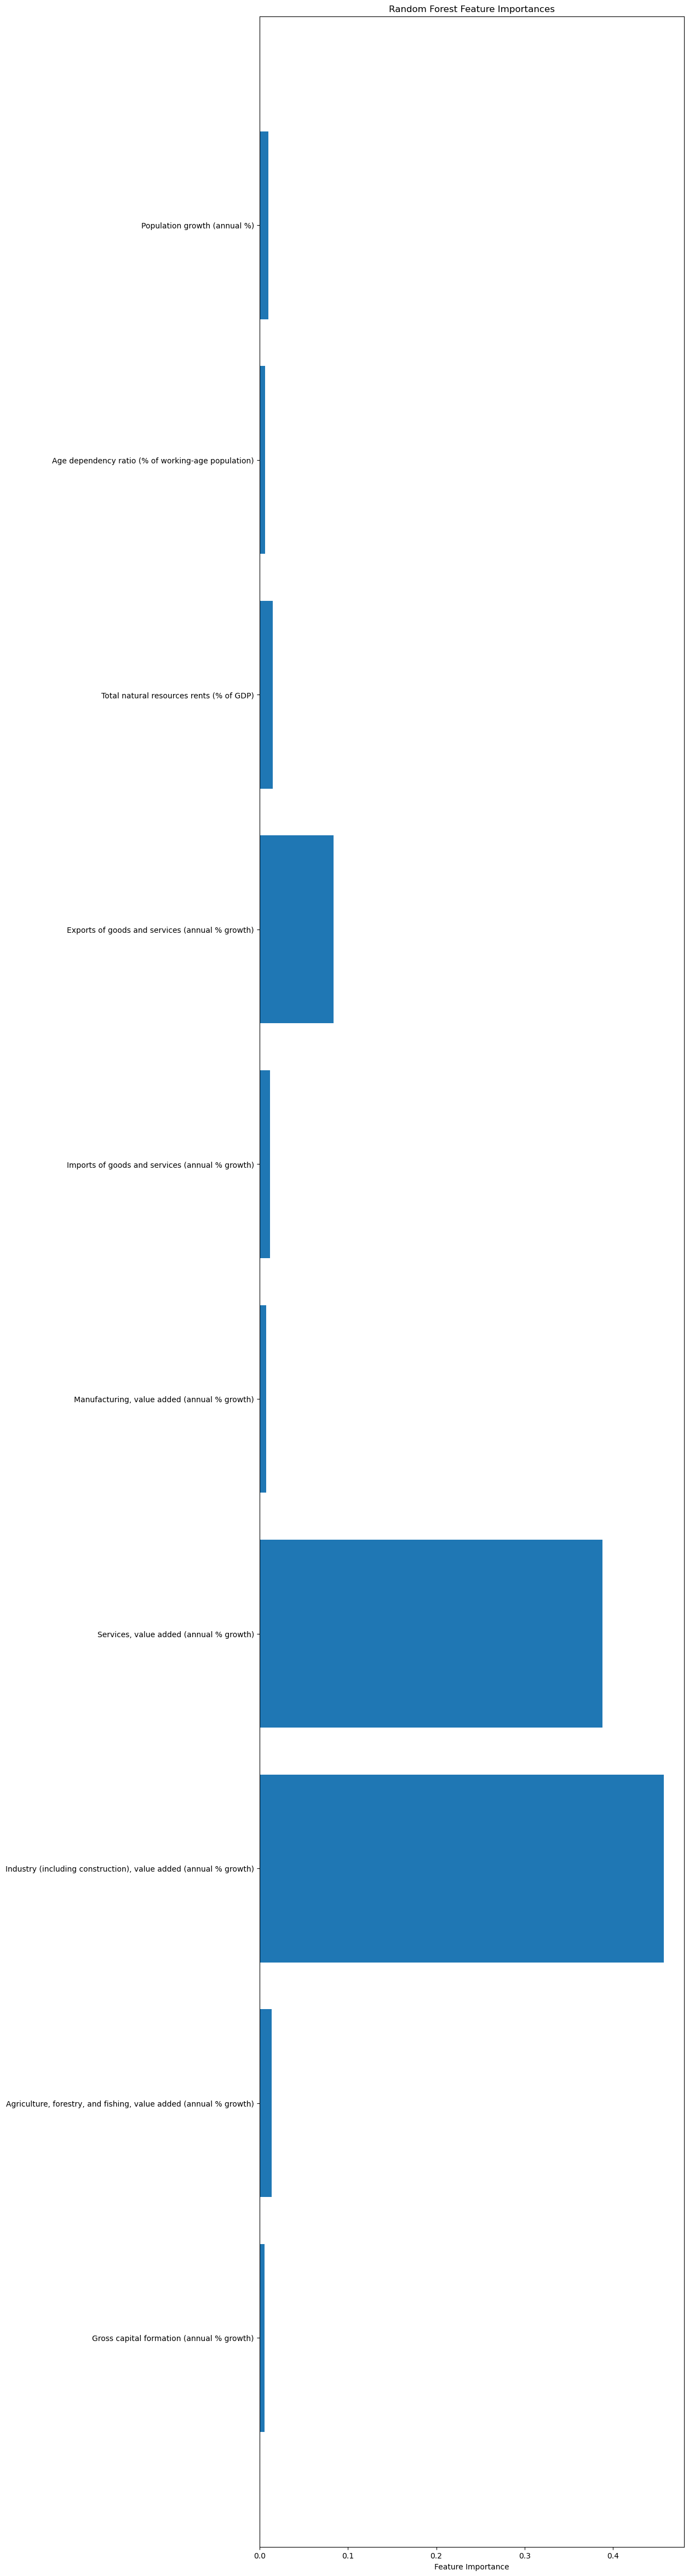

In [75]:
import matplotlib.pyplot as plt

importance = model.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(10,60))
plt.barh(features, importance)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()